In [1]:
%pip install numpy  -q
%pip install tensorflow  -q
%pip install matplotlib  -q
%pip install seaborn -q
%pip install SciPy -q


import os 
import numpy as np 
from matplotlib import pyplot as plt 
import pandas as pd 
import seaborn as sns 

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras 
from keras import metrics 
tf.get_logger().setLevel('INFO')

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


2024-03-03 22:33:28.383371: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Data Preprocessing

In [2]:
def count_files_in_directory(directory):
    # Check if the directory exists
    if not os.path.exists(directory):
        print("Directory '{}' does not exist.".format(directory))
        return -1

    # Initialize a counter for files
    file_count = 0

    # Iterate over the files in the directory
    for root, dirs, files in os.walk(directory):
        file_count += len(files)

    return file_count

# Example usage:
directory_path = "/Users/npovejsil/Downloads/wildfire_folder/train"
file_count = count_files_in_directory(directory_path)
if file_count >= 0:
    print("Number of files in directory '{}': {}".format(directory_path, file_count))

Number of files in directory '/Users/npovejsil/Downloads/wildfire_folder/train': 30251


In [3]:
test_path= '/Users/npovejsil/Downloads/wildfire_folder/test'
train_path = '/Users/npovejsil/Downloads/wildfire_folder/train'
val_path = '/Users/npovejsil/Downloads/wildfire_folder/valid'

In [4]:
#preprocessing_function = tf.keras.applications.vgg16.preprocess_input,
train_batches = ImageDataGenerator(
     rescale = 1./255.
    ) \
    .flow_from_directory(directory = train_path, target_size = (350,350), batch_size = 256, class_mode = "categorical")
test_batches = ImageDataGenerator(
    preprocessing_function = tf.keras.applications.vgg16.preprocess_input, rescale = 1./255.
    ) \
    .flow_from_directory(directory = test_path, target_size = (350,350), batch_size = 256, class_mode = "categorical")
val_batches = ImageDataGenerator(
    preprocessing_function = tf.keras.applications.vgg16.preprocess_input, rescale = 1./255.
    ) \
    .flow_from_directory(directory = val_path, target_size = (350,350), batch_size = 256, class_mode = "categorical")

Found 30250 images belonging to 2 classes.
Found 6300 images belonging to 2 classes.
Found 6300 images belonging to 2 classes.


In [5]:
%pip install scipy
import scipy as scipy
imgs, labels = next(train_batches)

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
# this function plots images in the form of a grid with 1 row and 10 columns 
def plotImages(images_arr):
    fig, axes = plt.subplots(1,10, figsize = (20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

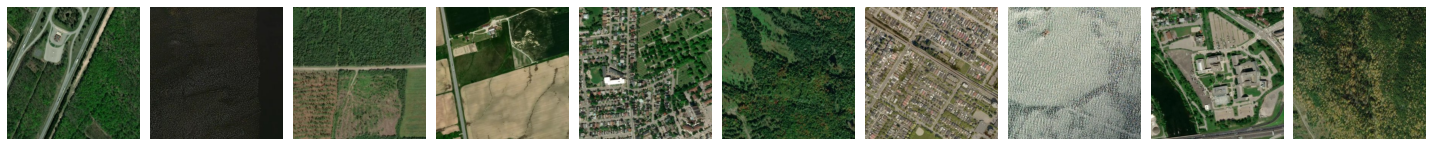

In [7]:
plotImages(imgs)
#print(labels)

# Building the Model

In [8]:
model = Sequential([
    Conv2D(filters = , kernel_size = , activation = , padding = , input_shape = ), # first layer 
    MaxPool2D(pool_size = , strides = ),
    Conv2D(filters = , kernel_size = , activation =, padding = ),
    MaxPool2D(pool_size =, strides = )
    Flatten(),
    Dense(units = , activation = ),
])

SyntaxError: invalid syntax (2022167586.py, line 2)

In [ ]:
def build_model(n_classes,
                hidden_layer_sizes=[],
                activation='relu',
                optimizer='SGD',
                learning_rate=0.01):
    """Build a multi-class logistic regression model using Keras.
    
    Returns:
      model: A tf.keras model (graph).
    """
    tf.keras.backend.clear_session()
    np.random.seed(0)
    tf.random.set_seed(0)

    # YOUR CODE HERE
    model = tf.keras.Sequential()
    #model.add(tf.keras.Input(shape=(2,), name='Input'))
    model.add(tf.keras.layers.Flatten())

    for hidden_layer_size in hidden_layer_sizes:
        model.add(tf.keras.layers.Dense(hidden_layer_size,
                                         activation=activation))
    model.add(tf.keras.layers.Dense(n_classes, activation='softmax'))

    if optimizer == 'SGD':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
def train_and_evaluate(data='digits',
                       hidden_layer_sizes=[],
                       activation='tanh',
                       optimizer='Adam',
                       learning_rate=0.01,
                       num_epochs=5):

  # Build the model.
  model = build_model(n_classes=10,
                      hidden_layer_sizes=hidden_layer_sizes,
                      activation=activation,
                      optimizer=optimizer,
                      learning_rate=learning_rate)

  # Select the dataset.
  if data == 'digits':
    X_train = X_train_digits
    X_test = X_test_digits
    Y_train = Y_train_digits
    Y_test = Y_test_digits
  elif data == 'fashion':
    X_train = X_train_fashion
    X_test = X_test_fashion
    Y_train = Y_train_fashion
    Y_test = Y_test_fashion
  else:
    raise 'Unsupported dataset: %s' %data

  # Train the model.
  print('Training...')
  history = model.fit(
    x=X_train,
    y=Y_train,
    epochs=num_epochs,
    batch_size=64,
    validation_split=0.1,
    verbose=0)

  # Retrieve the training metrics (after each train epoch) and the final test
  # accuracy.
  train_accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  plt.plot(train_accuracy, label='train_accuracy')
  plt.plot(val_accuracy, label='validation accuracy')
  plt.xticks(range(num_epochs))
  plt.xlabel('Train epochs')
  plt.legend()
  plt.show()

  test_accuracy = model.evaluate(x=X_test, y=Y_test, verbose=0,
                                 return_dict=True)['accuracy']
  print(model.summary())
  return test_accuracy

print('Test Accuracy: %1.4f' %train_and_evaluate())

In [ ]:
%pip install tensorflow 


You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [8]:
DATA_PATH = '/Users/npovejsil/Downloads/wildfire_folder/'
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [9]:
def load_data_split(path_to_data, split):
    
    images = []
    labels = []
    problematic_files = []

    split_dir = os.path.join(path_to_data, split)
    if os.path.isdir(split_dir):
        for root, _, files in os.walk(split_dir):
            for file in files:
                img_path = os.path.join(root, file)
                try:
                    img = load_img(img_path, target_size=(350, 350))
                    img_array = img_to_array(img)

                    if np.isnan(img_array).any() or np.isinf(img_array).any():
                        raise ValueError("Image is truncated or corrupted")
                    images.append(img_array)
                    labels.append(os.path.basename(root))  # Use the parent directory name as the label
                except Exception as e:
                    print(f"Error loading image {img_path}: {str(e)}")
                    problematic_files.append(img_path)

    images = np.array(images)
    labels = np.array(labels)

    return images, labels, problematic_files

In [11]:
train_images, train_labels, train_problematic_files = load_data_split(DATA_PATH, 'train')

Error loading image /Users/npovejsil/Downloads/wildfire_folder/train/.DS_Store: cannot identify image file <_io.BytesIO object at 0x7ff2d38d9400>
Error loading image /Users/npovejsil/Downloads/wildfire_folder/train/nowildfire/-114.152378,51.027198.jpg: image file is truncated (16 bytes not processed)


: 

In [ ]:
val_images, val_labels, val_problematic_files = load_data_split(DATA_PATH, 'valid')

In [ ]:
test_images, test_labels, test_problematic_files = load_data_split(DATA_PATH, 'test')

In [10]:
print('imgs shape', imgs.shape)
print('labels shape', labels.shape)

single_column_labels = np.argmax(labels, axis=1)
reshaped_labels = np.reshape(labels, (-1, 1))

imgs shape (256, 350, 350, 3)
labels shape (256, 2)


In [11]:
# Create a Sequential model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

input_shape = imgs.shape[1:]  # Exclude the batch size dimension
model.add(tf.keras.layers.Flatten(input_shape=(350, 350, 3)))
model.add(tf.keras.layers.Dense(
    units=1,
    input_shape=input_shape,
    activation='sigmoid'
))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(imgs, reshaped_labels, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
7/7 [==============================] - 3s 159ms/step - loss: 21.4547 - accuracy: 0.5049 - val_loss: 5.9548 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 0s 68ms/step - loss: 3.2140 - accuracy: 0.5735 - val_loss: 2.7148 - val_accuracy: 0.4615
Epoch 3/10
7/7 [==============================] - 0s 55ms/step - loss: 0.9914 - accuracy: 0.6814 - val_loss: 1.4578 - val_accuracy: 0.4231
Epoch 4/10
7/7 [==============================] - 0s 71ms/step - loss: 1.2822 - accuracy: 0.6814 - val_loss: 4.8887 - val_accuracy: 0.5000
Epoch 5/10
7/7 [==============================] - 0s 57ms/step - loss: 2.2033 - accuracy: 0.6127 - val_loss: 2.5612 - val_accuracy: 0.5000
Epoch 6/10
7/7 [==============================] - 0s 48ms/step - loss: 1.2765 - accuracy: 0.6471 - val_loss: 2.1597 - val_accuracy: 0.4231
Epoch 7/10
7/7 [==============================] - 0s 58ms/step - loss: 0.3956 - accuracy: 0.8578 - val_loss: 1.8565 - val_accuracy: 0.3846
Epoch 8/10
7/7 [=========

In [16]:
tf.keras.backend.clear_session()
model2 = tf.keras.Sequential()

input_shape = imgs.shape[1:]  # Exclude the batch size dimension
model2.add(tf.keras.layers.Flatten(input_shape=(350, 350, 3)))
model2.add(tf.keras.layers.Dense(
    units=1,
    input_shape=input_shape,
    activation = 'sigmoid'

))

# Compile the model
optimizer = 'SGD'
model2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['accuracy'])
# Train the model
history = model2.fit(imgs, reshaped_labels, epochs=10, batch_size=32, validation_split=0.2)




Epoch 1/10
7/7 [==============================] - 1s 109ms/step - loss: 42.6477 - accuracy: 0.4608 - val_loss: 5.8897 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 0s 62ms/step - loss: 39.3582 - accuracy: 0.4902 - val_loss: 84.0813 - val_accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 0s 47ms/step - loss: 43.5689 - accuracy: 0.5245 - val_loss: 26.6701 - val_accuracy: 0.5000
Epoch 4/10
7/7 [==============================] - 0s 48ms/step - loss: 39.4142 - accuracy: 0.5392 - val_loss: 8.3423 - val_accuracy: 0.4808
Epoch 5/10
7/7 [==============================] - 1s 99ms/step - loss: 28.3688 - accuracy: 0.5588 - val_loss: 20.2007 - val_accuracy: 0.5000
Epoch 6/10
7/7 [==============================] - 1s 79ms/step - loss: 33.8509 - accuracy: 0.5343 - val_loss: 59.3909 - val_accuracy: 0.5000
Epoch 7/10
7/7 [==============================] - 1s 110ms/step - loss: 47.9759 - accuracy: 0.4706 - val_loss: 18.1257 - val_accuracy: 0.5000
Epoch 8/10
7/